#  Delivery_time -> Predict delivery time using sorting time 

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [107]:
df=pd.read_csv("delivery_time.csv")

In [109]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [110]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [112]:
~df.duplicated()

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
dtype: bool

In [113]:
data=df.rename({"Delivery Time":"delivery_time","Sorting Time":"sorting_time"},axis=1)

In [114]:
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


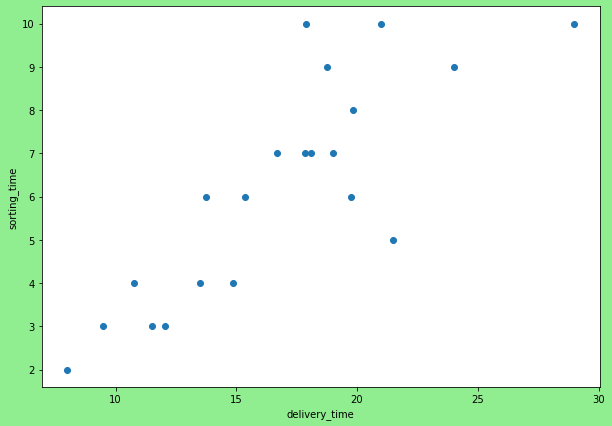

In [115]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data.delivery_time,data.sorting_time)
plt.xlabel("delivery_time")
plt.ylabel("sorting_time")
plt.show()

In [116]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [117]:
data.shape

(21, 2)

# Creating Model with Sklearn

In [119]:
lm=LinearRegression()
X=data["delivery_time"].values.reshape(-1,1)  
Y=data["sorting_time"].values.reshape(-1,1)
reg_sklearn=lm.fit(X,Y)

In [120]:
print(reg_sklearn.coef_) 
print(reg_sklearn.intercept_) 

[[0.41374363]]
[-0.75667337]


In [121]:
reg_sklearn.predict(X)

array([[ 7.93194282],
       [ 4.82886561],
       [ 7.41476329],
       [ 9.17317371],
       [11.24189185],
       [ 5.59429132],
       [ 7.10445557],
       [ 3.1738911 ],
       [ 6.64933758],
       [ 7.00101966],
       [ 7.44786278],
       [ 3.69107064],
       [ 6.14457035],
       [ 4.00137836],
       [ 4.22066248],
       [ 5.39983182],
       [ 4.93230152],
       [ 6.73622374],
       [ 2.55327566],
       [ 6.62037552],
       [ 8.13881464]])

In [124]:
pred_train_lm=reg_sklearn.predict(X)
r2_score(data["sorting_time"],pred_train_lm)

0.682271474841723

# Model with Statsmodels

In [125]:
first_model=smf.ols("sorting_time~delivery_time",data=data).fit()

In [126]:
first_model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [127]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        15:41:46   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
model2=smf.ols("sorting_time~np.log(delivery_time)",data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.59e-06
Time:                        15:41:47   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(delivery_time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
model3=smf.ols("np.log(sorting_time)~delivery_time",data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Thu, 22 Jun 2023   Prob (F-statistic):           2.64e-06
Time:                          15:41:47   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
delivery_time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
data["delivery_time_sq"]=data.delivery_time**2
model4=smf.ols("np.log(sorting_time)~delivery_time+delivery_time_sq",data=data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.794
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     34.62
Date:                  Thu, 22 Jun 2023   Prob (F-statistic):           6.77e-07
Time:                          15:41:47   Log-Likelihood:                 3.2337
No. Observations:                    21   AIC:                           -0.4673
Df Residuals:                        18   BIC:                             2.666
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7780      0.450     -1.730      0.101      -1.723       0.167
delivery_time        0.2272      0.052      4.346      0.000       0.117       0.337
delivery_time_sq    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
data

,delivery_time,sorting_time,delivery_time_sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


# Salary_hike -> Build a prediction model for Salary_hike

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [133]:
data1=pd.read_csv("Salary_Data.csv")

In [135]:
data1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [136]:
data1.shape

(30, 2)

In [137]:
data1.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [138]:
~data1.duplicated()

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
dtype: bool

<AxesSubplot:>

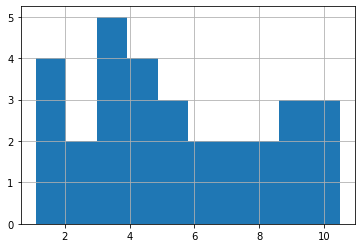

In [139]:
data1["YearsExperience"].hist()

<AxesSubplot:>

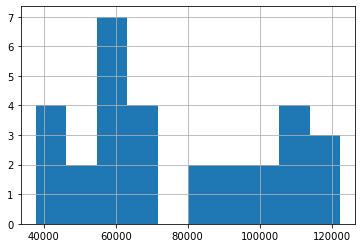

In [140]:
data1["Salary"].hist()

<AxesSubplot:>

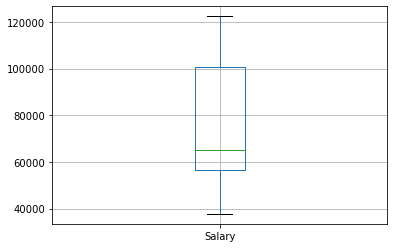

In [142]:
data1.boxplot(column=["Salary"])

In [143]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


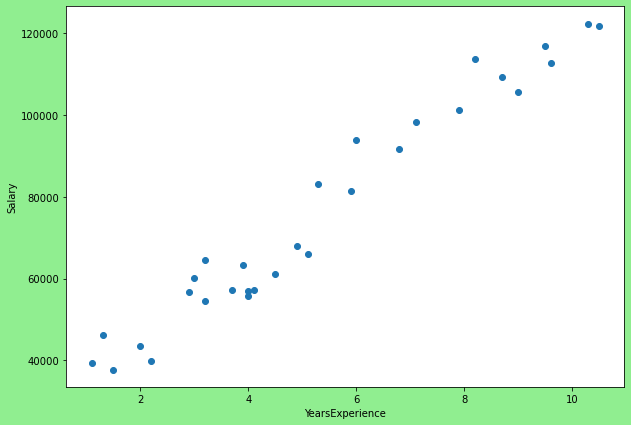

In [144]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data1.YearsExperience,data1.Salary)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [145]:
model1=smf.ols("Salary~YearsExperience",data=data1).fit()

In [146]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [147]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        16:00:14   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""